# Convolutional Neural Netwok
## ML Kamar Berantakan

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# persiapkan datanya
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-07-14 01:50:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  2.39MB/s    in 20s     

2021-07-14 01:50:36 (3.32 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# melakukan ekstraksi pada file tsb
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('/tmp/images/train')

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/messy_vs_clean_room.zip'

In [4]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [5]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [6]:
# proses augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=4,
    # karena kita merupakan klarifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
# membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# memanggil fungsi compile pada objek model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
# pelatihan model menggunakan fit
history = model.fit(
            train_generator,
            steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
            epochs=20,
            validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
            validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
            verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7450 - accuracy: 0.5400 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 7s - loss: 0.6885 - accuracy: 0.5400 - val_loss: 0.6649 - val_accuracy: 0.7500
Epoch 3/20
25/25 - 7s - loss: 0.6969 - accuracy: 0.6100 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 7s - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 7s - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 7s - loss: 0.6940 - accuracy: 0.4700 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 7s - loss: 0.7015 - accuracy: 0.5500 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 7s - loss: 0.6913 - accuracy: 0.5200 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 7s - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 7s - loss: 0.6866 - accuracy: 0.5600 - val_loss: 0.6543 - val_accuracy: 0.6000
Epoch 11/20
25/25 -

Saving kamar.jpg to kamar.jpg
kamar.jpg

 Clean or Messy : MESSY


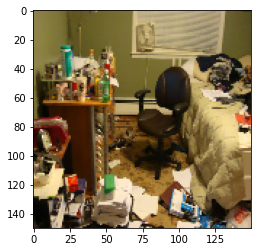

In [11]:
# melihat hasil dari model yang kita buat
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('\n Clean or Messy : CLEAN')
  else:
    print('\n Clean or Messy : MESSY')

48/48 - 4s - loss: 0.6330 - accuracy: 0.6354


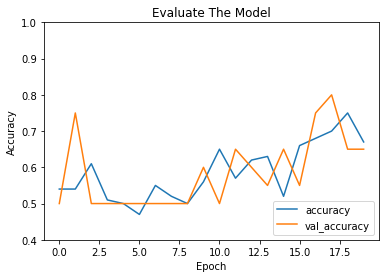

In [12]:
# Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.title("Evaluate The Model")
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_generator, verbose=2)

In [13]:
# cetak akurasi
print(test_acc)

0.6354166865348816


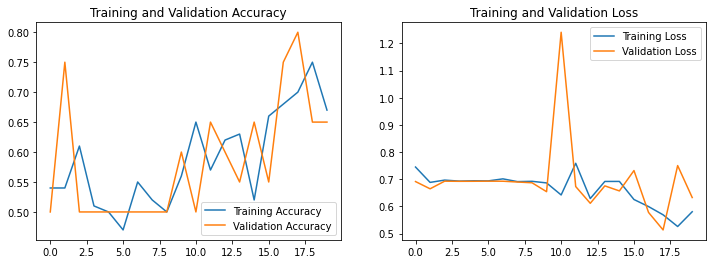

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

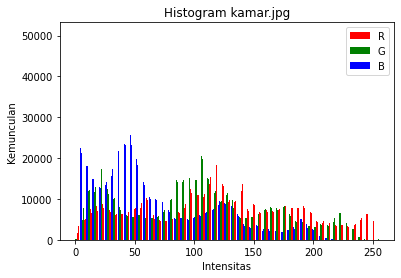

In [17]:
# Histogram Citra

from matplotlib import pyplot
from os.path import basename
from os.path import splitext
from PIL import Image

def get_file_name(local_zip):
    # https://stackoverflow.com/a/678266/9157799
    return splitext(basename(local_zip))[0]

def tampilkan_histogram(r, g, b, gambar):
    intensitas = list(range(256))
    lebar_bar = 0.3

    # https://stackoverflow.com/q/9304408/9157799
    intensitas = [i-lebar_bar for i in intensitas]
    # https://stackoverflow.com/q/14270391/9157799
    pyplot.bar(intensitas, r, width=lebar_bar, color='r')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, g, width=lebar_bar, color='g')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, b, width=lebar_bar, color='b')

    pyplot.title('Histogram ' + gambar)
    pyplot.xlabel('Intensitas')
    pyplot.ylabel('Kemunculan')
    pyplot.legend(['R', 'G', 'B'])
    pyplot.show()

def histogram(gambar):
    GAMBAR = Image.open(gambar)
    PIXEL = GAMBAR.load()

    ukuran_horizontal = GAMBAR.size[0]
    ukuran_vertikal = GAMBAR.size[1]

    gambar_r = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_r = gambar_r.load()

    gambar_g = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_g = gambar_g.load()

    gambar_b = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_b = gambar_b.load()

    # https://stackoverflow.com/q/10712002/9157799
    r = [0] * 256
    g = [0] * 256
    b = [0] * 256

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            intensitas_r = PIXEL[x, y][0]
            intensitas_g = PIXEL[x, y][1]
            intensitas_b = PIXEL[x, y][2]
            r[intensitas_r] += 1
            g[intensitas_g] += 1
            b[intensitas_b] += 1
            pixel_r[x, y] = (intensitas_r, 0, 0)
            pixel_g[x, y] = (0, intensitas_g, 0)
            pixel_b[x, y] = (0, 0, intensitas_b)

    gambar_r.save(get_file_name(gambar) + '_r.jpg')
    gambar_g.save(get_file_name(gambar) + '_g.jpg')
    gambar_b.save(get_file_name(gambar) + '_b.jpg')

    tampilkan_histogram(r, g, b, gambar)

histogram('kamar.jpg')